In [78]:
import pandas as pd
import numpy as np
import os
import json

In [79]:
import os
import numpy as np
import pandas as pd
import torch
import os
import json
import pandas as pd
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline
from tqdm import tqdm
import glob
import pickle

In [2]:
!ls

challenge-2019-classes-description-500.csv
challenge-2019-label500-hierarchy.json
challenge-2019-train-detection-bbox.csv
challenge-2019-train-detection-human-imagelabels.csv
challenge-2019-validation-detection-bbox.csv
challenge-2019-validation-detection-human-imagelabels.csv
eda.ipynb
sample_submission.csv
train_0.pkl
train_1-5.pkl
train_1.pkl
train_2.pkl


In [5]:
with open('challenge-2019-label500-hierarchy.json', 'r') as f:
    json_data = json.load(f)

In [14]:
json_data['LabelName']

'/m/0bl9f'

In [12]:
json_data['Subcategory']

[{'LabelName': '/m/0242l'},
 {'LabelName': '/m/03120'},
 {'LabelName': '/m/0h8l4fh'},
 {'LabelName': '/m/0138tl',
  'Subcategory': [{'LabelName': '/m/0167gd'},
   {'LabelName': '/m/01j51'},
   {'LabelName': '/m/029b3'},
   {'LabelName': '/m/02zt3'},
   {'LabelName': '/m/0kmg4'}]},
 {'LabelName': '/m/019dx1',
  'Subcategory': [{'LabelName': '/m/0174k2'},
   {'LabelName': '/m/01k6s3'},
   {'LabelName': '/m/029bxz'},
   {'LabelName': '/m/02pjr4'},
   {'LabelName': '/m/02wv84t'},
   {'LabelName': '/m/02x984l'},
   {'LabelName': '/m/03s_tn'},
   {'LabelName': '/m/040b_t'},
   {'LabelName': '/m/04169hn'},
   {'LabelName': '/m/063rgb'},
   {'LabelName': '/m/07xyvk'},
   {'LabelName': '/m/0fx9l'},
   {'LabelName': '/m/0llzx'},
   {'LabelName': '/m/03ldnb'}]},
 {'LabelName': '/m/02pkr5',
  'Subcategory': [{'LabelName': '/m/0130jx'},
   {'LabelName': '/m/01vbnl'},
   {'LabelName': '/m/02f9f_'},
   {'LabelName': '/m/02jz0l'},
   {'LabelName': '/m/03dnzn'},
   {'LabelName': '/m/09g1w'}]},
 {'Label

In [51]:
df_des = pd.read_csv('challenge-2019-classes-description-500.csv', names=['label', 'name'])
df_des.head()

label        name
0  /m/061hd_  Infant bed
1   /m/06m11        Rose
2   /m/03120        Flag
3  /m/01kb5b  Flashlight
4  /m/0120dh  Sea turtle

In [4]:
len(df_des)

500

In [56]:
df_train = pd.read_csv('challenge-2019-train-detection-bbox.csv')
df_train.head()

ImageID  Source LabelName  Confidence      XMin      XMax  \
0  8d6dec80235b6fea  xclick  /m/09j5n           1  0.760000  0.778125   
1  8d6dec80235b6fea  xclick  /m/09j5n           1  0.817500  0.831875   
2  8d6dec80235b6fea  xclick  /m/09j5n           1  0.843125  0.870000   
3  8d6dec80235b6fea  xclick  /m/09j5n           1  0.867500  0.891875   
4  8d6dec80235b6fea  xclick  /m/09j5n           1  0.895625  0.911250   

       YMin      YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  \
0  0.645892  0.673277           0            0          0            0   
1  0.628895  0.661945           0            0          0            0   
2  0.619452  0.645892           0            0          0            0   
3  0.597734  0.625118           0            0          0            0   
4  0.625118  0.656280           0            0          0            0   

   IsInside  
0         0  
1         0  
2         0  
3         0  
4         0

In [164]:
len(df_train.LabelName.unique())

500

In [7]:
df_train.Confidence.value_counts()

1    12195144
Name: Confidence, dtype: int64

In [57]:
len(df_train.ImageID.unique())

1674979

In [29]:
df_train.Source.value_counts()

xclick       10889331
activemil     1305813
Name: Source, dtype: int64

In [31]:
df_train.IsInside.value_counts()

 0    12140929
 1       34833
-1       19382
Name: IsInside, dtype: int64

In [32]:
len(df_train)

12195144

In [452]:
IMG_DIR = '/mnt/chicm/data/open-images/train/imgs'
def show_train(filename):
    fn = os.path.join(IMG_DIR, filename)
    img_id = os.path.basename(filename).split('.')[0]
    df_bbox = df_train.loc[df_train.ImageID==img_id]
    #img = cv2.imread(fn)
    img = Image.open(fn)
    #h, w, _ = img.shape
    #print(img.shape)
    bboxes = df_bbox[['XMin', 'YMin', 'XMax', 'YMax']].values
    print(bboxes)
    #print(bboxes, type(bboxes))
    labels = df_bbox.LabelName.values
    label_names = [class_dict[x] for x in labels]
    print(label_names, len(label_names))
    
    draw_bounding_boxes_on_image(img, bboxes, use_normalized_coordinates=True)
    
    plt.figure(figsize=(15, 10))
    plt.imshow(img)

[[0.194336 0.       0.553711 0.949267]
 [0.231445 0.462232 0.493164 0.754228]
 [0.472656 0.330327 0.526367 0.374295]
 [0.37207  0.92221  0.464844 0.998873]
 [0.476562 0.452086 0.494141 0.499436]
 [0.496094 0.471251 0.512695 0.492672]
 [0.556641 0.420519 0.592773 0.476888]
 [0.603516 0.445321 0.633789 0.476888]
 [0.692383 0.420519 0.711914 0.457723]
 [0.710938 0.43292  0.732422 0.452086]
 [0.850586 0.03044  0.999023 0.330327]
 [0.321289 0.373168 0.492188 0.998873]
 [0.912109 0.332582 0.999023 0.64487 ]
 [0.489258 0.03044  0.623047 0.478016]
 [0.850586 0.       0.999023 0.656144]
 [0.464844 0.3292   0.677734 0.978579]
 [0.680664 0.104848 0.811523 0.219842]
 [0.824219 0.080045 0.852539 0.125141]
 [0.852539 0.072153 0.876953 0.109357]
 [0.900391 0.       0.999023 0.039459]
 [0.43457  0.109357 0.551758 0.478016]
 [0.493164 0.135287 0.523438 0.279594]
 [0.581055 0.116122 0.625977 0.276212]
 [0.647461 0.243517 0.674805 0.317926]
 [0.701172 0.22097  0.741211 0.255919]
 [0.836914 0.100338 0.919

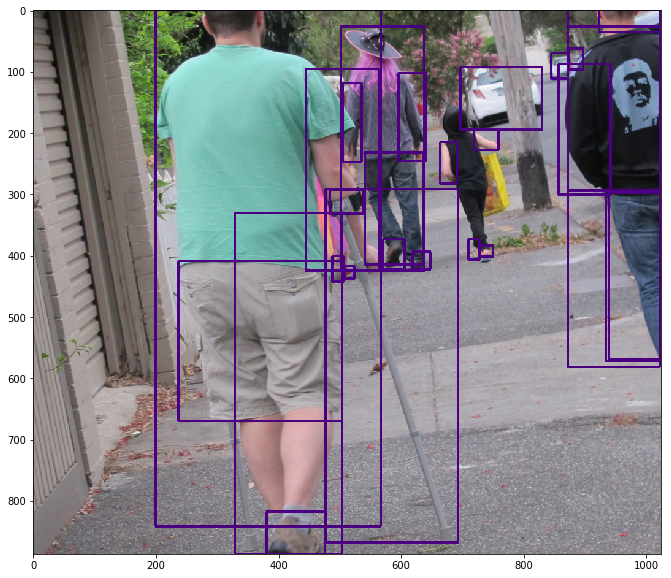

In [453]:
show_train('train_0/00010417d07870a7.jpg')

In [14]:
num_objs = df_train.LabelName.value_counts().values
top_classes = df_train.LabelName.value_counts().index

In [13]:
num_objs[:100].sum() / num_objs.sum()

0.941568053644959

In [15]:
top_classes[:100]

Index(['/m/04yx4', '/m/07j7r', '/m/0dzct', '/m/01g317', '/m/03bt1vf',
       '/m/09j5n', '/m/0d4v4', '/m/0c9ph5', '/m/083wq', '/m/0k4j', '/m/03q69',
       '/m/0dzf4', '/m/04hgtk', '/m/05r655', '/m/0cgh4', '/m/03jm5',
       '/m/01mzpv', '/m/0h9mv', '/m/01xyhv', '/m/01bl7v', '/m/04bcr3',
       '/m/079cl', '/m/01prls', '/m/019jd', '/m/0fly7', '/m/014sv8',
       '/m/0k65p', '/m/035r7c', '/m/0138tl', '/m/01fdzj', '/m/0k0pj',
       '/m/01bqk0', '/m/0jyfg', '/m/01d40f', '/m/07yv9', '/m/015p6',
       '/m/033rq4', '/m/0283dt1', '/m/0cdl1', '/m/0bt_c3', '/m/04brg2',
       '/m/0271t', '/m/04dr76w', '/m/0199g', '/m/0c_jw', '/m/06msq',
       '/m/03120', '/m/0bt9lr', '/m/0270h', '/m/0hg7b', '/m/02xwb',
       '/m/032b3c', '/m/0342h', '/m/026t6', '/m/017ftj', '/m/01n5jq',
       '/m/0ch_cf', '/m/0gjbg72', '/m/03fp41', '/m/0fm3zh', '/m/0cmf2',
       '/m/0h8mhzd', '/m/02dgv', '/m/0f4s2w', '/m/039xj_', '/m/0jbk',
       '/m/01bfm9', '/m/04szw', '/m/0zvk5', '/m/03p3bw', '/m/09ddx',
       '/m/08

In [31]:
df_counts = pd.DataFrame(df_train.LabelName.value_counts())
df_counts.index.name = 'class'
df_counts.columns =['count']
df_counts.head()
df_counts.to_csv('top_classes.csv', index=True)

In [25]:
type(df_counts)

pandas.core.series.Series

In [424]:
def get_top_classes(start_index, end_index):
    df = pd.read_csv('top_classes.csv')
    c = df['class'].values[start_index:end_index]
    #print(df.head())
    stoi = { c[i]: i for i in range(len(c)) }
    return c, stoi

top_classes, stoi = get_top_classes(0, 500)

In [427]:
top_classes_desc = []
class_dict = {}
for c in top_classes:
    n = df_des.loc[df_des.label == c].name.values[0]
    top_classes_desc.append((c, n))
    class_dict[c] = n

In [426]:
top_classes_desc[:20]

[('/m/04yx4', 'Man'),
 ('/m/07j7r', 'Tree'),
 ('/m/0dzct', 'Human face'),
 ('/m/01g317', 'Person'),
 ('/m/03bt1vf', 'Woman'),
 ('/m/09j5n', 'Footwear'),
 ('/m/0d4v4', 'Window'),
 ('/m/0c9ph5', 'Flower'),
 ('/m/083wq', 'Wheel'),
 ('/m/0k4j', 'Car'),
 ('/m/03q69', 'Human hair'),
 ('/m/0dzf4', 'Human arm'),
 ('/m/04hgtk', 'Human head'),
 ('/m/05r655', 'Girl'),
 ('/m/0cgh4', 'Building'),
 ('/m/03jm5', 'House'),
 ('/m/01mzpv', 'Chair'),
 ('/m/0h9mv', 'Tire'),
 ('/m/01xyhv', 'Suit'),
 ('/m/01bl7v', 'Boy')]

In [32]:
!ls

challenge-2019-classes-description-500.csv
challenge-2019-label500-hierarchy.json
challenge-2019-train-detection-bbox.csv
challenge-2019-train-detection-human-imagelabels.csv
challenge-2019-validation-detection-bbox.csv
challenge-2019-validation-detection-human-imagelabels.csv
eda.ipynb
sample_submission.csv
top_classes.csv
train_0.pkl
train_1-5.pkl
train_1.pkl
train_2.pkl


In [33]:
!head -n 5 top_classes.csv

class,count
/m/04yx4,1418594
/m/07j7r,1051344
/m/0dzct,1037710
/m/01g317,1034721


In [166]:
# visualize

import numpy as np
import PIL.Image as Image
import PIL.ImageDraw as ImageDraw
import PIL.ImageFont as ImageFont

INDIGO = (75, 0, 130)


def draw_bounding_box_on_image(
    image,
    x_min,
    y_min,
    x_max,
    y_max,
    color,
    thickness=4,
    display_str_list=(),
    use_normalized_coordinates=False,
    fontsize=20
):
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size
    if use_normalized_coordinates:
        (left, right, top, bottom) = (x_min * im_width, x_max * im_width, y_min * im_height, y_max * im_height)
    else:
        (left, right, top, bottom) = (x_min, x_max, y_min, y_max)
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top), (left, top)], width=thickness, fill=color)
    try:
        font = ImageFont.truetype('DejaVuSansMono.ttf', fontsize)
    except IOError:
        font = ImageFont.load_default()

    # If the total height of the display strings added to the top of the bounding
    # box exceeds the top of the image, stack the strings below the bounding box
    # instead of above.
    display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
    # Each display_str has a top and bottom margin of 0.05x.
    total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

    if top > total_display_str_height:
        text_bottom = top
    else:
        text_bottom = bottom + total_display_str_height
    # Reverse list and print from bottom to top.
    for display_str in display_str_list[::-1]:
        text_width, text_height = font.getsize(display_str)
        margin = np.ceil(0.05 * text_height)
        draw.rectangle([(left, text_bottom - text_height - 2 * margin), (left + text_width, text_bottom)], fill=color)
        draw.text((left + margin, text_bottom - text_height - margin), display_str, fill=color, font=font)
        text_bottom -= text_height - 2 * margin


def draw_bounding_boxes_on_image_array(
    image, bboxes, color=INDIGO, thickness=4, use_normalized_coordinates=False, fontsize=20
):
    image_pil = Image.fromarray(image)
    draw_bounding_boxes_on_image(image_pil, bboxes, color, thickness, use_normalized_coordinates, fontsize)
    np.copyto(image, np.array(image_pil))


def draw_bounding_boxes_on_image(
    image, bboxes, color=INDIGO, thickness=4, use_normalized_coordinates=False, fontsize=20
):
    for bbox in bboxes:
        draw_bounding_box_on_image(
            image, bbox[0], bbox[1], bbox[2], bbox[3], color, thickness, (), use_normalized_coordinates, fontsize
        )


In [37]:
!ls


challenge-2019-classes-description-500.csv
challenge-2019-label500-hierarchy.json
challenge-2019-train-detection-bbox.csv
challenge-2019-train-detection-human-imagelabels.csv
challenge-2019-validation-detection-bbox.csv
challenge-2019-validation-detection-human-imagelabels.csv
eda.ipynb
sample_submission.csv
top_classes.csv
train_0.pkl
train_1-5.pkl
train_1.pkl
train_2.pkl


In [170]:
with open('train_0.pkl', 'rb') as f:
    annos = pickle.load(f)

In [43]:
annos[0]

{'filename': '000002b66c9c498e.jpg',
 'width': 1024,
 'height': 1024,
 'ann': {'bboxes': array([[  12.8     ,  152.00052 ,  199.99948 ,  601.6     ],
         [  25.6     ,  731.2005  ,  283.2005  ,  971.2005  ],
         [ 155.1995  ,  203.1995  ,  318.39948 ,  604.8     ],
         [ 262.4     ,  667.2005  ,  440.00052 ,  947.2     ],
         [ 263.99948 ,  241.60051 ,  355.2     ,  395.2005  ],
         [ 327.99948 ,  267.2005  ,  377.6     ,  336.      ],
         [ 422.4     ,  123.199486,  967.9995  ,  486.4     ],
         [  65.59949 ,  910.4005  ,  504.00052 , 1017.6     ],
         [ 308.7995  ,  473.6     , 1014.4     ,  609.5995  ],
         [ 320.      ,  359.99948 ,  592.      ,  475.2005  ],
         [ 536.0005  ,  684.8     ,  950.4     , 1004.8     ]],
        dtype=float32),
  'labels': array([339, 339, 339, 339, 339, 339, 339, 135, 135, 135,  26])}}

In [168]:
IMG_DIR = '/mnt/chicm/data/open-images/train/imgs/train_0'
def get_annotated_img(anno):
    fn = os.path.join(IMG_DIR, anno['filename'])
    img = Image.open(fn)
    draw_bounding_boxes_on_image(img, anno['ann']['bboxes'])
    return img

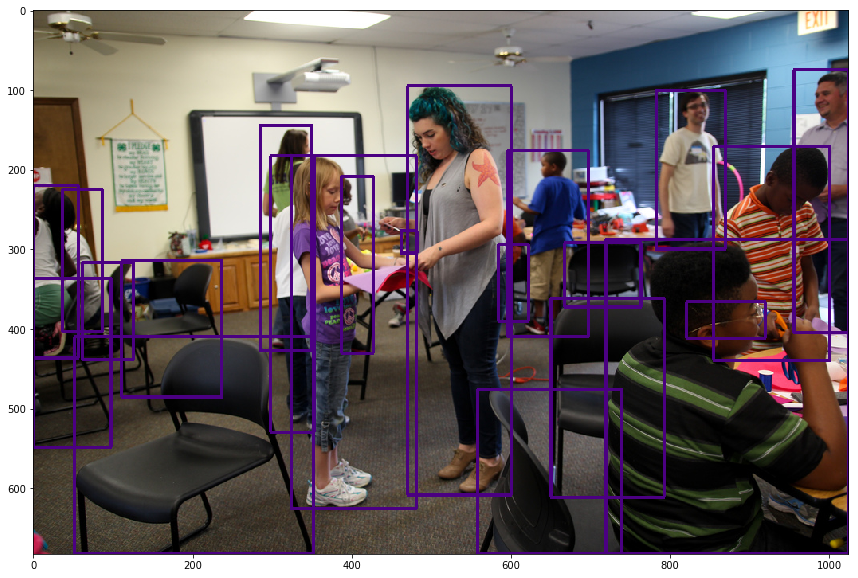

In [171]:
plt.figure(figsize=(15, 10))
plt.imshow(get_annotated_img(annos[102]))

In [270]:
# submission

with open('/mnt/chicm/open-images/work_dirs/faster_rcnn_r50_fpn_1x/preds_0704_4.pkl', 'rb') as f:
    preds = pickle.load(f)

In [249]:
len(preds[0][0])

0

In [250]:
preds[1]

[array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[6.7034094e+02, 1.9119884e+02, 7.0003479e+02, 2.3143716e+02,
         2.1336146e-01]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[4.2367195e+01, 1.5290352e+02, 6.3113416e+02, 3.9905850e+02,
         6.8737581e-02]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),

In [251]:
def get_classes():
    df = pd.read_csv('challenge-2019-classes-description-500.csv', header=None, names=['classes', 'description'])
    c = df.classes.values
    #print(df.head())
    stoi = { c[i]: i for i in range(len(c)) }
    return c, stoi
classes, _ = get_classes()
classes[:5]

array(['/m/061hd_', '/m/06m11', '/m/03120', '/m/01kb5b', '/m/0120dh'],
      dtype=object)

In [252]:
def get_top_classes(start_index, end_index):
    df = pd.read_csv('top_classes.csv')
    c = df['class'].values[start_index:end_index]
    #print(df.head())
    stoi = { c[i]: i for i in range(len(c)) }
    return c, stoi

top_100_classes, _ = get_top_classes(0, 100)
top_100_classes[:5]

array(['/m/04yx4', '/m/07j7r', '/m/0dzct', '/m/01g317', '/m/03bt1vf'],
      dtype=object)

In [253]:
top_100_classes[-5:]

array(['/m/03hl4l9', '/m/03vt0', '/m/07mhn', '/m/0dbvp', '/m/07fbm7'],
      dtype=object)

In [254]:
threshold=0.05
top_threshold = 0.25

def get_threshold(c):
    if c in set(top_100_classes):
        return top_threshold
    else:
        return threshold

In [255]:
get_threshold('/m/0120dh')

0.05

In [256]:
def get_preds(raw_pred):
    res = {
        'labels': [],
        'scores': [],
        'bboxes': []
    }
    for i, p in enumerate(raw_pred):
        if len(p) > 0:
            for e in p:
                th = get_threshold(classes[i])
                if e[4] > th:
                    res['labels'].append(i)
                    res['scores'].append(e[4])
                    res['bboxes'].append(e[:4])
    res['labels'] = np.array(res['labels'])
    res['scores'] = np.array(res['scores'])
    res['bboxes'] = np.array(res['bboxes'])
    return res

In [175]:
df_test = pd.read_csv('sample_submission.csv')
df_test.head()

ImageId                                   PredictionString
0  b5d912e06f74e948  /m/05s2s 0.9 0.46 0.08 0.93 0.5 /m/0c9ph5 0.5 ...
1  be137cf6bb0b62d5  /m/05s2s 0.9 0.46 0.08 0.93 0.5 /m/0c9ph5 0.5 ...
2  8d65ca08cb5ce8e8  /m/05s2s 0.9 0.46 0.08 0.93 0.5 /m/0c9ph5 0.5 ...
3  4d3ad1e52ad8c065  /m/05s2s 0.9 0.46 0.08 0.93 0.5 /m/0c9ph5 0.5 ...
4  9b94408691c7d7bf  /m/05s2s 0.9 0.46 0.08 0.93 0.5 /m/0c9ph5 0.5 ...

In [196]:
TEST_IMG_DIR = '/mnt/chicm/data/open-images/test'
def show_preds(idx):
    plt.figure(figsize=(15, 10))
    p = get_preds(preds[idx])
    img_id = df_test.iloc[idx].ImageId
    fn = os.path.join(TEST_IMG_DIR, '{}.jpg'.format(img_id))
    img = Image.open(fn)
    draw_bounding_boxes_on_image(img, p['bboxes'])
    
    plt.imshow(img)
    labels = [classes[i] for i in p['labels']]
    labels = [df_des.loc[df_des.label==x].name for x in labels]
    print(labels)

[261    Mobile phone
Name: name, dtype: object, 288    Whiteboard
Name: name, dtype: object]


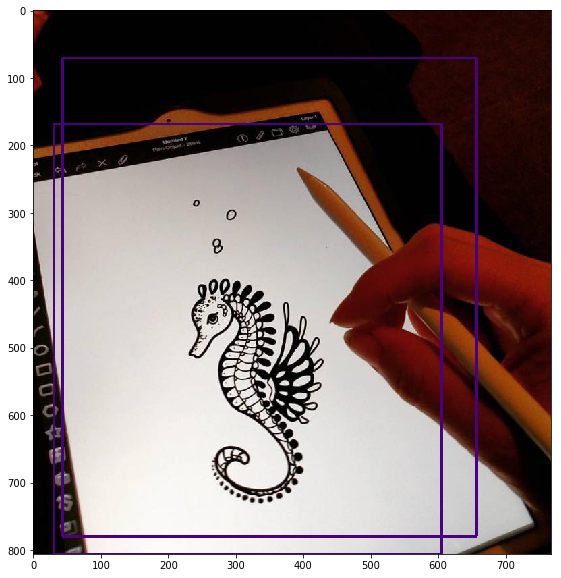

In [257]:
show_preds(2)

[16    Human nose
Name: name, dtype: object, 25    Cake
Name: name, dtype: object, 28    Bread
Name: name, dtype: object, 29    Tree
Name: name, dtype: object, 29    Tree
Name: name, dtype: object, 29    Tree
Name: name, dtype: object, 31    Bed
Name: name, dtype: object, 33    Hat
Name: name, dtype: object, 61    Fedora
Name: name, dtype: object, 113    Man
Name: name, dtype: object, 140    Glasses
Name: name, dtype: object, 228    Fountain
Name: name, dtype: object, 269    Bust
Name: name, dtype: object, 279    Human face
Name: name, dtype: object, 338    Person
Name: name, dtype: object, 387    Cowboy hat
Name: name, dtype: object, 435    Sun hat
Name: name, dtype: object, 442    Sculpture
Name: name, dtype: object]


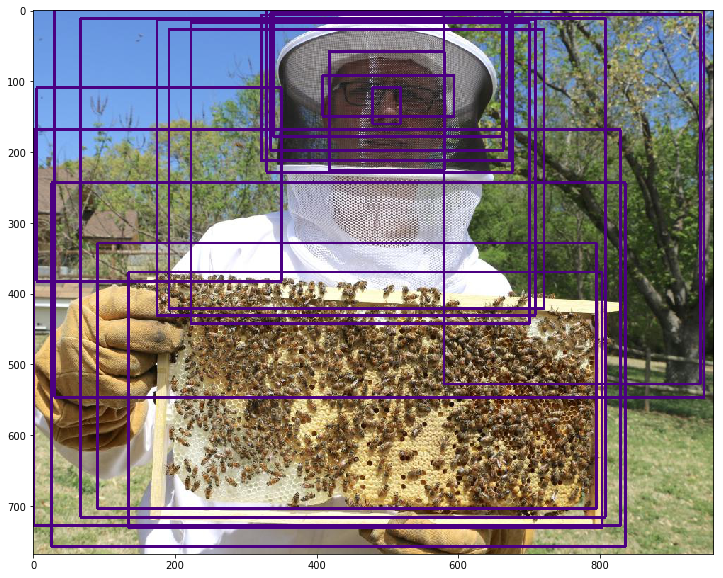

In [258]:
show_preds(3)

[70    Footwear
Name: name, dtype: object, 70    Footwear
Name: name, dtype: object, 70    Footwear
Name: name, dtype: object, 70    Footwear
Name: name, dtype: object, 70    Footwear
Name: name, dtype: object, 70    Footwear
Name: name, dtype: object, 70    Footwear
Name: name, dtype: object, 70    Footwear
Name: name, dtype: object, 70    Footwear
Name: name, dtype: object, 70    Footwear
Name: name, dtype: object, 113    Man
Name: name, dtype: object, 113    Man
Name: name, dtype: object, 113    Man
Name: name, dtype: object, 113    Man
Name: name, dtype: object, 113    Man
Name: name, dtype: object, 113    Man
Name: name, dtype: object, 134    Table
Name: name, dtype: object, 134    Table
Name: name, dtype: object, 134    Table
Name: name, dtype: object, 164    Woman
Name: name, dtype: object, 164    Woman
Name: name, dtype: object, 164    Woman
Name: name, dtype: object, 230    Jeans
Name: name, dtype: object, 230    Jeans
Name: name, dtype: object, 230    Jeans
Name: name, dtype:

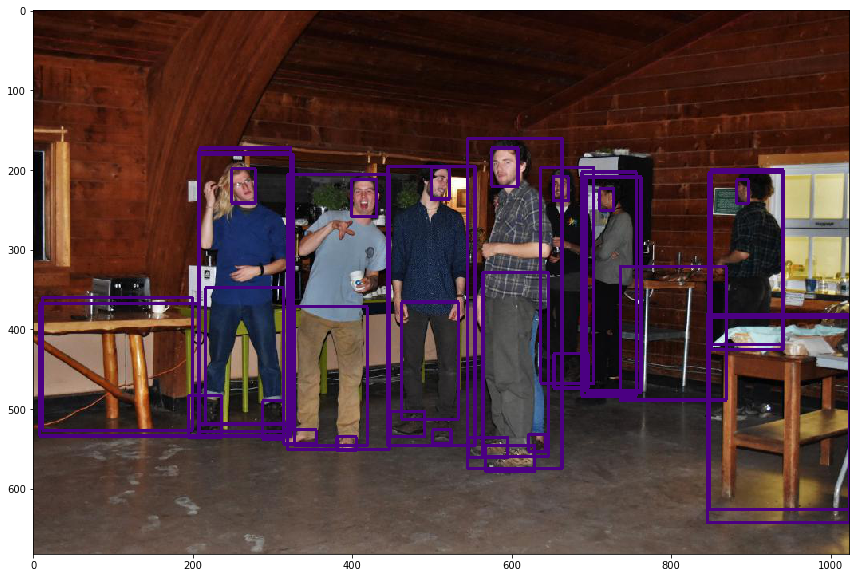

In [259]:
show_preds(0)

[70    Footwear
Name: name, dtype: object, 70    Footwear
Name: name, dtype: object, 70    Footwear
Name: name, dtype: object, 70    Footwear
Name: name, dtype: object, 99    Chair
Name: name, dtype: object, 113    Man
Name: name, dtype: object, 113    Man
Name: name, dtype: object, 113    Man
Name: name, dtype: object, 134    Table
Name: name, dtype: object, 164    Woman
Name: name, dtype: object, 164    Woman
Name: name, dtype: object]


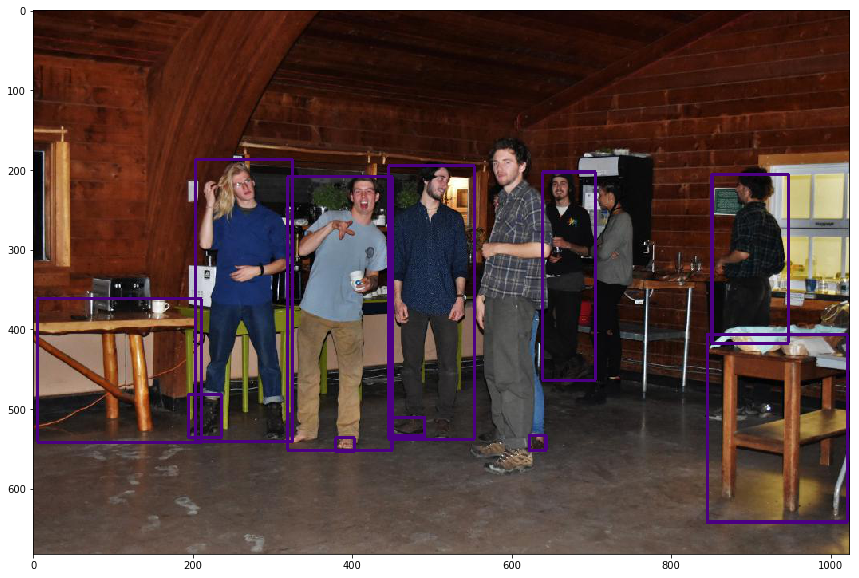

In [53]:
show_preds(0)

In [59]:
tmp = get_preds(preds[3])

In [60]:
tmp

{'labels': array([ 29,  29, 140, 279]),
 'scores': array([0.766332  , 0.44943482, 0.601925  , 0.8916548 ], dtype=float32),
 'bboxes': array([[610.77576 ,   9.713906, 957.33685 , 537.59534 ],
        [  0.      ,  13.696621, 960.      , 486.15906 ],
        [412.04343 ,  89.849785, 588.78    , 149.56502 ],
        [413.20358 ,  67.772064, 582.5175  , 222.14546 ]], dtype=float32)}

In [180]:
import struct
import imghdr

def get_image_size(fname):
    '''Determine the image type of fhandle and return its size.
    from draco'''
    with open(fname, 'rb') as fhandle:
        head = fhandle.read(24)
        if len(head) != 24:
            raise AssertionError('imghead len != 24')
        if imghdr.what(fname) == 'png':
            check = struct.unpack('>i', head[4:8])[0]
            if check != 0x0d0a1a0a:
                raise AssertionError('png check failed')
            width, height = struct.unpack('>ii', head[16:24])
        elif imghdr.what(fname) == 'gif':
            width, height = struct.unpack('<HH', head[6:10])
        elif imghdr.what(fname) == 'jpeg':
            try:
                fhandle.seek(0) # Read 0xff next
                size = 2
                ftype = 0
                while not 0xc0 <= ftype <= 0xcf:
                    fhandle.seek(size, 1)
                    byte = fhandle.read(1)
                    while ord(byte) == 0xff:
                        byte = fhandle.read(1)
                    ftype = ord(byte)
                    size = struct.unpack('>H', fhandle.read(2))[0] - 2
                # We are at a SOFn block
                fhandle.seek(1, 1)  # Skip `precision' byte.
                height, width = struct.unpack('>HH', fhandle.read(4))
            except Exception: #IGNORE:W0703
                raise
        else:
            print(fname, imghdr.what(fname))
            #raise AssertionError('file format not supported')
            img = cv2.imread(fname)
            print(img.shape)
            height, width, _ = img.shape

        return width, height


In [181]:
df_test['h'] = df_test.ImageId.map(lambda x: get_image_size(os.path.join(TEST_IMG_DIR, '{}.jpg'.format(x)))[1])

In [182]:
df_test['w'] = df_test.ImageId.map(lambda x: get_image_size(os.path.join(TEST_IMG_DIR, '{}.jpg'.format(x)))[0])

In [260]:
df_test.head()

ImageId                                   PredictionString    h  \
0  b5d912e06f74e948  /m/0cgh4 0.2223875 0.00027710001450031996 0.0 ...  682   
1  be137cf6bb0b62d5  /m/0k0pj 0.18726064 0.6531728506088257 0.27665...  682   
2  8d65ca08cb5ce8e8  /m/06m11 0.14998318 0.5702830155690511 0.38381...  806   
3  4d3ad1e52ad8c065  /m/0k0pj 0.21488623 0.494336655187061 0.140063...  768   
4  9b94408691c7d7bf  /m/04kkgm 0.12534142 0.2694949209690094 0.3646...  682   

      w  
0  1024  
1  1024  
2   768  
3   961  
4  1024

In [261]:
final_preds = []

for p in tqdm(preds, total=len(preds)):
    final_preds.append(get_preds(p))

100%|██████████| 99999/99999 [00:52<00:00, 1896.01it/s]


In [262]:
total_objs = 0
for p in final_preds:
    total_objs += len(p['labels'])
print(total_objs)

1572825


In [263]:
#from multiprocessing import Pool
#with Pool(50) as pool:
#    new_preds = list(tqdm(iterable=pool.map(get_preds, preds[:1000]), total=len(preds)))

In [264]:
def get_pred_str(pred, w, h):
    res = []
    for label, score, bbox in zip(pred['labels'], pred['scores'], pred['bboxes']):
        res.append(classes[label])
        res.append(score)
        res.append(bbox[0]/w)
        res.append(bbox[1]/h)
        res.append(bbox[2]/w)
        res.append(bbox[3]/h)
    res = [str(x) for x in res]
    return ' '.join(res)

In [265]:
pred_strs = []
for i, p in tqdm(enumerate(final_preds), total=len(final_preds)):
    h = df_test.iloc[i].h
    w = df_test.iloc[i].w
    pred_strs.append(get_pred_str(p, w, h))
    

100%|██████████| 99999/99999 [01:08<00:00, 1461.73it/s]


In [266]:
pred_strs[:5]

['/m/09j5n 0.64383286 0.1898123174905777 0.7093893817442952 0.23119601607322693 0.7852801101997801 /m/09j5n 0.6165436 0.553195595741272 0.8012016050277218 0.6152212023735046 0.8488997741878207 /m/09j5n 0.60655457 0.4367915987968445 0.7386018188118585 0.480166494846344 0.783446191692632 /m/09j5n 0.5697884 0.6055355072021484 0.7812717471304527 0.6284916400909424 0.8101499674956469 /m/09j5n 0.55053586 0.5331470966339111 0.7869632307035832 0.5811117887496948 0.8217521063393511 /m/09j5n 0.50499517 0.3711756765842438 0.785429923765121 0.39639928936958313 0.8085790729243035 /m/09j5n 0.48638496 0.6376244425773621 0.6323420281284365 0.6801135540008545 0.6944549650041238 /m/09j5n 0.44022977 0.2811400890350342 0.7185391065312271 0.30719342827796936 0.7878323104724156 /m/09j5n 0.34359348 0.4886208176612854 0.7721000962243402 0.5123501420021057 0.7967733344024927 /m/09j5n 0.29427984 0.3064591586589813 0.7725051477158175 0.3469517230987549 0.7974892893145161 /m/04yx4 0.90635514 0.4343852698802948 0.

In [267]:
len(pred_strs)

99999

In [268]:
df_test.PredictionString = pred_strs
df_test.head()

ImageId                                   PredictionString    h  \
0  b5d912e06f74e948  /m/09j5n 0.64383286 0.1898123174905777 0.70938...  682   
1  be137cf6bb0b62d5  /m/0l14j_ 0.06873758 0.04137421399354935 0.224...  682   
2  8d65ca08cb5ce8e8  /m/050k8 0.22360547 0.05701456467310587 0.0884...  806   
3  4d3ad1e52ad8c065  /m/0k0pj 0.30457067 0.49806662727220996 0.1423...  768   
4  9b94408691c7d7bf  /m/04kkgm 0.08707536 0.28384023904800415 0.383...  682   

      w  
0  1024  
1  1024  
2   768  
3   961  
4  1024

In [269]:
df_test.to_csv('sub_0704_3_3_157k_mixth.csv', index=False, columns=['ImageId', 'PredictionString'])

In [69]:
!head -n 5 sub1.csv

ImageId,PredictionString
b5d912e06f74e948,/m/09j5n 0.5961139 0.37001925706863403 0.7871483050483413 0.39387765526771545 0.8097740911668346 /m/09j5n 0.59422165 0.190261110663414 0.7081041531828491 0.23061998188495636 0.7858854500778959 /m/09j5n 0.5880282 0.6066007614135742 0.7815858723481031 0.6285202503204346 0.8086686567826704 /m/09j5n 0.53066516 0.4371750056743622 0.7498843732817082 0.4798552393913269 0.7827220927934843 /m/01mzpv 0.5072599 0.8249764442443848 0.5971446107209952 0.9979155659675598 0.9405375282086236 /m/04yx4 0.7786609 0.43459537625312805 0.28671989552785926 0.540476381778717 0.7885518451589992 /m/04yx4 0.6479821 0.31088787317276 0.30704493816297423 0.4400302469730377 0.8080840795970033 /m/04yx4 0.522141 0.8301452994346619 0.3030800917281433 0.9249167442321777 0.6119290796542797 /m/04bcr3 0.6016201 0.005388629622757435 0.5311443966504765 0.20629775524139404 0.7935977163902126 /m/03bt1vf 0.6200959 0.6231992840766907 0.29893988108704866 0.6885237097740173 0.67975327835754

In [326]:
!ls *.pkl

test.pkl	       train_0-e_100-400.pkl  train_0-e_400-500.pkl	val.pkl
train_0-e_0-100.pkl    train_0-e_100-500.pkl  train_0-e_50-100.pkl
train_0-e_0-50.pkl     train_0-e_200-300.pkl  train_0-e_all.pkl
train_0-e_100-200.pkl  train_0-e_300-400.pkl  train_0-e_bottom-400.pkl


In [328]:
with open('train_0-e_0-50.pkl', 'rb') as f:
    ann0 = pickle.load(f)

In [329]:
with open('train_0-e_50-100.pkl', 'rb') as f:
    ann50 = pickle.load(f)

In [357]:
with open('train_0-e_100-500.pkl', 'rb') as f:
    ann100_500 = pickle.load(f)

In [373]:
with open('train_0-e_100-200.pkl', 'rb') as f:
    ann100_200 = pickle.load(f)
    print(len(ann100_200))

197523


In [375]:
with open('train_0-e_200-300.pkl', 'rb') as f:
    ann200_300 = pickle.load(f)
    print(len(ann200_300))

88804


In [376]:
with open('train_0-e_300-400.pkl', 'rb') as f:
    ann300_400 = pickle.load(f)
    print(len(ann300_400))

43987


In [378]:
with open('train_0-e_400-500.pkl', 'rb') as f:
    ann400_500 = pickle.load(f)
    print(len(ann400_500))

18474


In [443]:
with open('/mnt/chicm/data/open-images/detect/train_0-e_100-200.pkl', 'rb') as f:
    ann100 = pickle.load(f)
with open('/mnt/chicm/data/open-images/detect/train_0-e_200-300.pkl', 'rb') as f:
    ann200 = pickle.load(f)
with open('/mnt/chicm/data/open-images/detect/train_0-e_300-400.pkl', 'rb') as f:
    ann300 = pickle.load(f)
with open('/mnt/chicm/data/open-images/detect/train_0-e_400-500.pkl', 'rb') as f:
    ann400 = pickle.load(f)
with open('/mnt/chicm/data/open-images/detect/train_0-e_50-100.pkl', 'rb') as f:
    ann50 = pickle.load(f)
with open('/mnt/chicm/data/open-images/detect/train_0-e_0-50.pkl', 'rb') as f:
    ann0 = pickle.load(f)

#return mmcv.load(ann_file)
for i in range(len(ann100)):
    ann100[i]['ann']['labels'] += 100
for i in range(len(ann200)):
    ann200[i]['ann']['labels'] += 200
for i in range(len(ann300)):
    ann300[i]['ann']['labels'] += 300
for i in range(len(ann400)):
    ann400[i]['ann']['labels'] += 400
for i in range(len(ann50)):
    ann50[i]['ann']['labels'] += 50

#        anns = ann400 + ann300 + shuffle(ann200)[:50000] + shuffle(ann100)[:50000] + shuffle(ann50)[:50000] + shuffle(ann0)[:50000]

In [330]:
ann0_50[0]

{'filename': 'train_0/000002c707c9895e.jpg',
 'width': 688,
 'height': 1024,
 'ann': {'bboxes': array([[ 36.52248, 327.5223 , 319.8161 , 859.25275]], dtype=float32),
  'labels': array([5])}}

In [334]:
fns_0_50 = set([x['filename'] for x in ann0_50])
fns_50_100 = set([x['filename'] for x in ann50_100])
fns_100_500 = set([x['filename'] for x in ann100_500])

In [341]:
len((fns_100_500))

325047

In [332]:
len(fns_0_50 & fns_50_100)

199483

In [336]:
len(fns_50_100 & fns_100_500)

43153

In [338]:
from sklearn.utils import shuffle

In [339]:
#return mmcv.load(ann_file)
for i in range(len(ann100_500)):
    ann100_500[i]['ann']['labels'] += 100
for i in range(len(ann50_100)):
    ann50_100[i]['ann']['labels'] += 50

anns = ann100_500 + shuffle(ann50_100)[:50000] + shuffle(ann0_50)[:70000]
print('DATASET LEN: ', len(anns))

DATASET LEN:  445047


In [444]:
def merge_ann(annos, max_nums=[50000]*6):
    print(sum([len(x) for x in annos]))
    merged_anns = annos[0].copy()
    merged_fn_dict = {}
    for i, ann in enumerate(merged_anns):
        merged_fn_dict[ann['filename']] = i
    
    for i in range(1, len(annos)):
        remain_anns = []
        found_anns = []
        for ann in annos[i]:
            if ann['filename'] in merged_fn_dict:
                found_anns.append(ann)
            else:
                remain_anns.append(ann)
        print(len(found_anns), len(remain_anns))
        selected_anns = (found_anns + shuffle(remain_anns))[:max_nums[i]]
        
        #for ann in annos[i]:
        for ann in selected_anns:
            if ann['filename'] in merged_fn_dict:
                idx = merged_fn_dict[ann['filename']]
                merged_anns[idx]['ann']['bboxes'] = np.concatenate([merged_anns[idx]['ann']['bboxes'], ann['ann']['bboxes']], axis=0)
                merged_anns[idx]['ann']['labels'] = np.concatenate([merged_anns[idx]['ann']['labels'], ann['ann']['labels']], axis=0)
                if ann['filename'] == 'train_0/00010417d07870a7.jpg':
                    print(ann['filename'], ':', len(merged_anns[idx]['ann']['labels']))
            else:
                merged_anns.append(ann)
                merged_fn_dict[ann['filename']] = len(merged_anns)-1
    print('merged len:', len(merged_anns))
    return merged_anns
        

In [445]:
merged = merge_ann([ann400,ann300,ann200,ann100, ann50,ann0])

1971406
1873 42114
4420 84384
train_0/00010417d07870a7.jpg : 8
12306 185217
16397 275233
train_0/00010417d07870a7.jpg : 11
78299 1252689
train_0/00010417d07870a7.jpg : 28
merged len: 177465


In [356]:
len(ann100_500)

601346

In [407]:
merged[0]

{'filename': 'train_0/000060e3121c7305.jpg',
 'width': 1024,
 'height': 683,
 'ann': {'bboxes': array([[ 835.84   ,  462.80148, 1015.04   ,  579.94214],
         [ 347.52   ,  435.27658,  401.28   ,  451.27927],
         [   0.     ,    0.     , 1023.36   ,  682.36005],
         [ 438.4    ,  369.3452 ,  522.88   ,  422.47443],
         [ 229.76   ,  213.15747, 1023.36   ,  682.36005],
         [ 257.28   ,  430.7954 ,  304.64   ,  458.3203 ],
         [ 259.84   ,  283.56998,  299.52   ,  328.37753],
         [ 289.28   ,  343.10028,  307.2    ,  395.5895 ],
         [ 300.8    ,  429.51547,  327.04   ,  453.19986],
         [ 312.32   ,  383.4273 ,  332.16   ,  399.43002],
         [ 319.36   ,  312.37482,  339.84   ,  336.05923],
         [ 334.72   ,  398.15005,  403.2    ,  458.3203 ],
         [ 375.68   ,  423.1144 ,  552.96   ,  681.72003],
         [ 399.36   ,  425.67496,  434.56   ,  445.51816],
         [ 401.92   ,  311.09488,  437.12   ,  334.7786 ],
         [ 454.4    ,

In [391]:
df_des = pd.read_csv('challenge-2019-classes-description-500.csv', names=['label', 'name'])
df_des.head()

label        name
0  /m/061hd_  Infant bed
1   /m/06m11        Rose
2   /m/03120        Flag
3  /m/01kb5b  Flashlight
4  /m/0120dh  Sea turtle

In [392]:
def get_top_classes(start_index, end_index):
    df = pd.read_csv('top_classes.csv')
    c = df['class'].values[start_index:end_index]
    #print(df.head())
    stoi = { c[i]: i for i in range(len(c)) }
    return c, stoi

classes,_ = get_top_classes(0, 500)

In [393]:
IMG_DIR = '/mnt/chicm/data/open-images/train/imgs'
def get_annotated_img(anno):
    fn = os.path.join(IMG_DIR, anno['filename'])
    img = Image.open(fn)
    draw_bounding_boxes_on_image(img, anno['ann']['bboxes'])
    return img

In [454]:
def show_anno(ann):
    print(ann['filename'])
    print(ann['ann']['labels'])
    labels = [classes[i-1] for i in ann['ann']['labels']]
    labels = [df_des.loc[df_des.label==x].name.values[0] for x in labels]
    print(labels, len(labels))
    plt.figure(figsize=(15, 10))
    plt.imshow(get_annotated_img(ann))

train_0/00010417d07870a7.jpg
[485 206 206 206 206 206 206 206  67  67  52   1  28  28   1   1  35  35
  35  35  12  12  12  12  12  12  25  25]
['Crutch', 'Human foot', 'Human foot', 'Human foot', 'Human foot', 'Human foot', 'Human foot', 'Human foot', 'Shorts', 'Shorts', 'Jacket', 'Man', 'Human leg', 'Human leg', 'Man', 'Man', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Human arm', 'Human arm', 'Human arm', 'Human arm', 'Human arm', 'Human arm', 'Jeans', 'Jeans'] 28


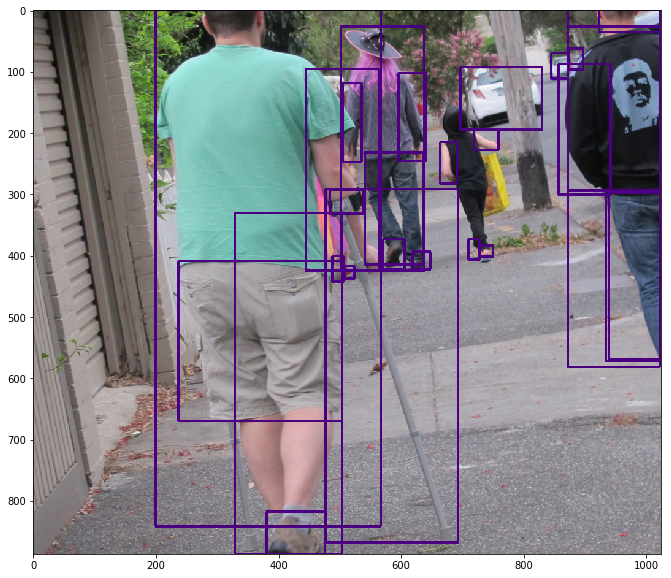

In [455]:
show_anno(merged[3])